In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [32]:
df.shape

(6, 3)

In [33]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [34]:
df.drop(['sno'],axis=1,inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [35]:
x=df.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [36]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Text(0.5, 1.0, 'Temperature vs Pressure')

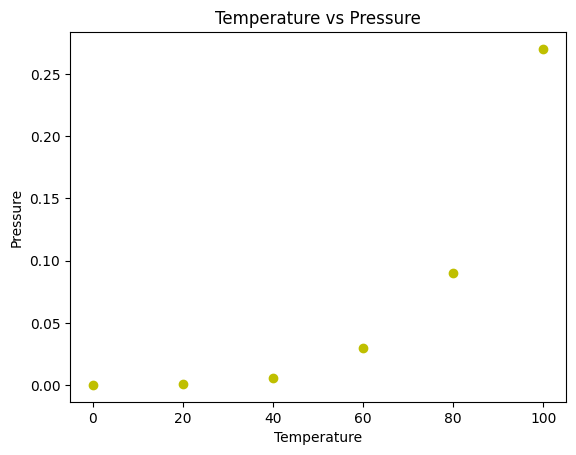

In [37]:
plt.scatter(x,y,color='y')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temperature vs Pressure')

In [38]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

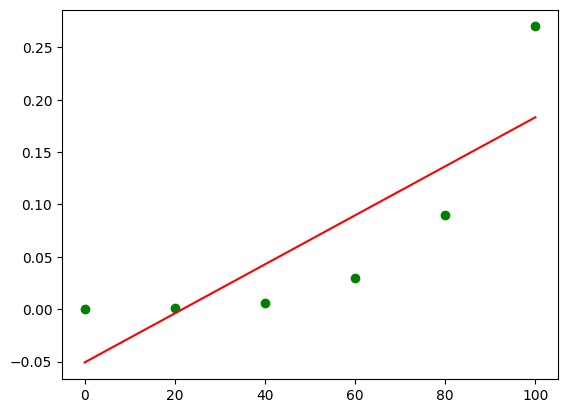

In [39]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color='r')

In [40]:
df1=pd.DataFrame({'Actual_value':y,'Predicted_value':y_pred,'Difference':y-y_pred})
df1

,Actual_value,Predicted_value,Difference
0,0.0002,-0.050867,0.051067
1,0.0012,-0.004027,0.005227
2,0.0060,0.042813,-0.036813
3,0.0300,0.089653,-0.059653
4,0.0900,0.136493,-0.046493
5,0.2700,0.183333,0.086667


In [41]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

mape=mean_absolute_percentage_error(y,y_pred)
mape

44.775078189300416

In [42]:
sc=r2_score(y,y_pred)
sc

0.690349972603981

In [43]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) #expands to give 3 features

x_poly=poly.fit_transform(x)
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [44]:
model2=LinearRegression()
model2.fit(x_poly,y)

y_pred2=model2.predict(x_poly)
y_pred2

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [45]:
mape2=mean_absolute_percentage_error(y,y_pred2)
mape2

15.926055555558678

In [46]:
sc2=r2_score(y,y_pred2)
sc2

0.9568461098911795

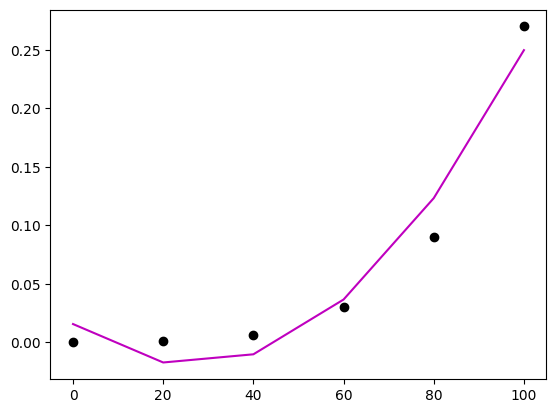

In [47]:
plt.scatter(x,y,color='k')
plt.plot(x,y_pred2,color='m')

In [48]:
df2=pd.DataFrame({'Actual_value':y,'LinearPredicted_value':y_pred,'PolyPredicted_value':y_pred2})
df2

,Actual_value,LinearPredicted_value,PolyPredicted_value
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975
